In [148]:
%load_ext autoreload
%autoreload 2
from helper import create_tsp_graph,plot_tsp_graph,bitstring_to_path,cost
from classical import solve_tsp_classical
from alternating_operator import get_expectation,analyse_result,create_qaoa_circ
from scipy.optimize import minimize
from qiskit.tools.visualization import plot_histogram
from qiskit import transpile,Aer
from qaoa import get_expectation_qaoa,create_classical_qaoa_circ
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [283]:
reps = 1
ncities = 5

In [266]:
G = create_tsp_graph(ncities)

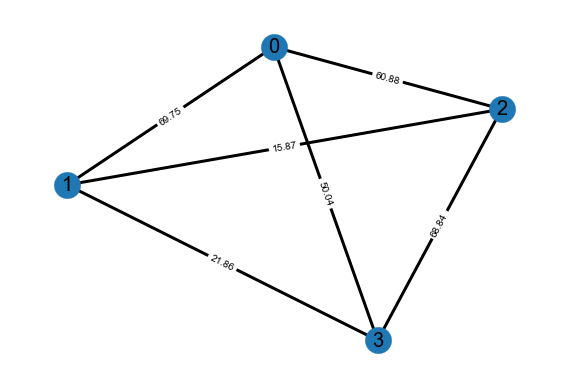

In [267]:
plot_tsp_graph(G)

In [282]:
expectation = get_expectation(G,reps,shots=1024,log_intermediate_counts=True)

res = minimize(expectation,
               [ 1,1, 1,1] ,
                      method='COBYLA',
                      options = {'tol' : 1e-6,'disp' : True,'maxiter':150})

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


Current expected cost: 199.15
Current expected cost: 199.15
Current expected cost: 199.15
Current expected cost: 198.96
Current expected cost: 198.96
Current expected cost: 203.64
Current expected cost: 204.24
Current expected cost: 198.96
Current expected cost: 198.74
Current expected cost: 198.74
Current expected cost: 203.69
Current expected cost: 204.24
Current expected cost: 198.74
Current expected cost: 204.27
Current expected cost: 197.38
Current expected cost: 203.58
Current expected cost: 195.65
Current expected cost: 196.92
Current expected cost: 195.65
Current expected cost: 204.5
Current expected cost: 202.65
Current expected cost: 203.7
Current expected cost: 199.47
Current expected cost: 203.98
Current expected cost: 200.88
Current expected cost: 195.65
Current expected cost: 197.7
Current expected cost: 197.78
Current expected cost: 197.04
Current expected cost: 198.02
Current expected cost: 196.26
Current expected cost: 196.42
Current expected cost: 195.65
Current expec

In [251]:
with open(".\data\G", "wb") as fp:   #Pickling
    pickle.dump(G,fp)

In [272]:
res

     fun: 194.66342877823254
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 51
  status: 1
 success: True
       x: array([1.85811476, 2.60997734, 4.88485984, 4.23665662])

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


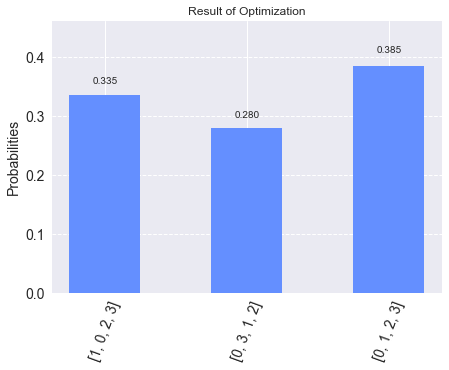

In [278]:
fig,counts = analyse_result(G,res.x,reps=reps,transform_labels_to_path=True,filter_unique_path=True,save_plot=True)
fig

In [253]:
for key, val in counts.items():
    if val>1:
        path = bitstring_to_path(key)
        print(path,':', val , f"   cost = {round(cost(G,path),2)}")

[3, 0, 1, 2] : 1024    cost = 84.62


In [268]:
solve_tsp_classical(G)

([0, 2, 1, 3], 148.65141871183963)

In [276]:
expectation_qaoa = get_expectation_qaoa(G,reps,shots=1024,penalty=1.,log_intermediate_counts=True)

res_qaoa = minimize(expectation_qaoa,
               [1 for _ in range(reps*2)] ,
                      method='COBYLA',
                      options = {'tol' : 1e-4,'disp' : True})

Current expected cost: 279.01
Current expected cost: 279.01
Current expected cost: 279.01
Current expected cost: 204.5
Current expected cost: 279.01
Current expected cost: 277.66
Current expected cost: 204.5
Current expected cost: 277.66
Current expected cost: 252.16
Current expected cost: 221.31
Current expected cost: 208.79
Current expected cost: 204.5
Current expected cost: 208.79
Current expected cost: 205.59
Current expected cost: 204.79
Current expected cost: 204.57
Current expected cost: 204.5
Current expected cost: 204.57
Current expected cost: 204.57
Current expected cost: 204.5
Current expected cost: 204.5
Current expected cost: 204.5
Current expected cost: 204.5
Current expected cost: 204.5


In [176]:
res_qaoa

     fun: 500.09391155402056
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
  status: 1
 success: True
       x: array([1., 1.])

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


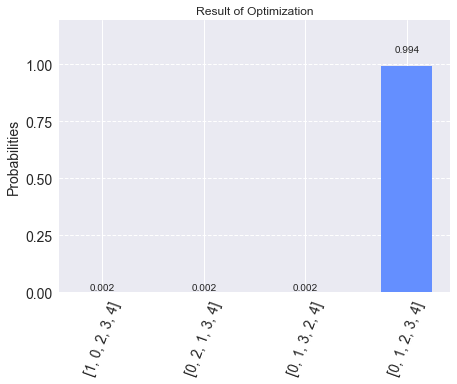

In [218]:
fig,counts = analyse_result(G,np.hstack([np.array([1.,1.]),res_qaoa.x]),reps=reps,transform_labels_to_path=True,filter_unique_path=True)
fig

## If 0,1,2,3,4 is "good" -> the algorithm almost always converges to that value 

In [223]:
def compute_circuit_sizes(ncities_max=6,reps=1):
    sizes_alternating_operator = []
    sizes_qaoa = []
    simulator = Aer.get_backend('aer_simulator')
    x = []
    
    for ncities in range(2,ncities_max+1,1):
        G = create_tsp_graph(ncities)
        x.append(ncities)
        
        alt_op = create_qaoa_circ(G,reps=reps)
        alt_op = transpile(alt_op, simulator,optimization_level = 3)
        sizes_alternating_operator.append(alt_op.depth())
        
        qaoa = create_classical_qaoa_circ(G,reps=reps)
        qaoa = transpile(qaoa, simulator,optimization_level = 1)
        sizes_qaoa.append(qaoa.depth())
    
    
    return (x,sizes_alternating_operator,sizes_qaoa)
        

In [225]:
compute_circuit_sizes(5,2)

([2, 3, 4, 5], [136, 771, 1656, 2738], [12, 37, 85, 211])

In [242]:
a = {'1000000101000010': 180.866, '1000010000100001': 234.667, '0010100001000001': 238.15}
b ={'1000000101000010': 210, '1000010000100001': 443, '0010100001000001': 371}

In [246]:
'0010100001000001' in b

True